# PCA trong sklearn (Principal Component Analysis)
PCA (Phân tích thành phần chính) là một kỹ thuật giảm chiều dữ liệu rất phổ biến trong học máy và thống kê, được dùng để:

Giảm số lượng đặc trưng (features) trong tập dữ liệu.

Tăng hiệu suất huấn luyện mô hình.

Tránh overfitting (nếu dữ liệu có quá nhiều chiều).

Trực quan hóa dữ liệu trong không gian 2D hoặc 3D.

1. Nguyên lý cơ bản của PCA
PCA tìm các trục mới (gọi là thành phần chính) sao cho:

Trục đầu tiên giữ lại nhiều phương sai nhất của dữ liệu.

Trục thứ hai trực giao với trục đầu tiên và giữ lại phần phương sai lớn nhất còn lại.

...

Về bản chất, PCA tái biểu diễn dữ liệu ban đầu trong một hệ trục mới ít chiều hơn, nhưng vẫn giữ lại phần lớn thông tin (phương sai).

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('housing.csv')


In [2]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
X = df.iloc[:, 0:8]

In [4]:
y = df.iloc[:, 8]

In [5]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

from sklearn.preprocessing import StandardScaler


In [8]:
scaleStandard = StandardScaler()
X_train = scaleStandard.fit_transform(X_train)
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [10]:
X_train = pd.DataFrame(X_train, columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'])

In [11]:
X_train.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.820818,0.826134,-0.648422,-0.377099,-0.593327,0.102754,-0.820388,0.998649
1,0.725211,-1.566836,0.512955,-0.056299,-0.425297,-0.070614,1.694568,-0.816138
2,0.290922,0.905900,0.074659,-0.023106,-0.588810,-0.078012,-0.688764,0.598696
3,-0.097760,1.863087,-0.226161,-0.266287,-0.341281,-0.093156,1.027047,-1.336076
4,-0.786758,-0.370351,-0.319477,0.015343,1.007480,0.023320,-0.721670,1.063641


In [12]:
X_train.describe().round(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.000,16512.000,16512.000,16512.000,16512.000,16512.000,16512.000,16512.000
mean,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.772,-2.205,-1.825,-1.598,-1.285,-0.203,-1.450,-2.366
25%,-0.687,-0.849,-0.393,-0.188,-0.573,-0.058,-0.797,-1.111
50%,-0.180,0.028,-0.080,-0.099,-0.233,-0.024,-0.646,0.539
75%,0.460,0.667,0.249,0.007,0.274,0.015,0.980,0.779
max,5.873,1.863,54.472,69.050,24.518,106.899,2.973,2.548


In [13]:
from sklearn.decomposition import PCA

pca1 = PCA()
X_pca1 = pca1.fit_transform(X_train)
pca1.explained_variance_ratio_

array([0.25230244, 0.23618836, 0.15979927, 0.12863355, 0.12549643,
       0.08190432, 0.01000742, 0.00566822])

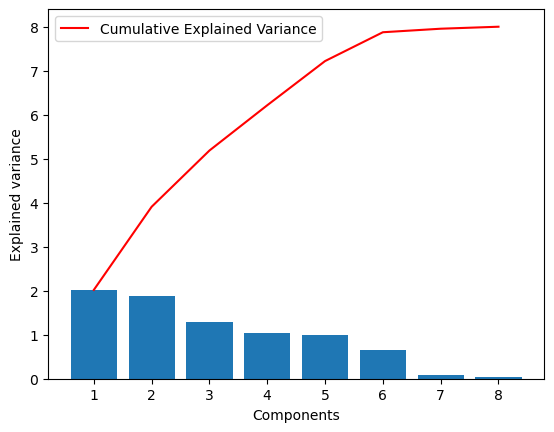

In [14]:
import matplotlib.pyplot as plt

plt.bar(range(1, len(pca1.explained_variance_) + 1), pca1.explained_variance_)
plt.ylabel('Explained variance')
plt.xlabel('Components')

plt.plot(range(1, len(pca1.explained_variance_) + 1),
         np.cumsum(pca1.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")

plt.legend(loc='upper left')

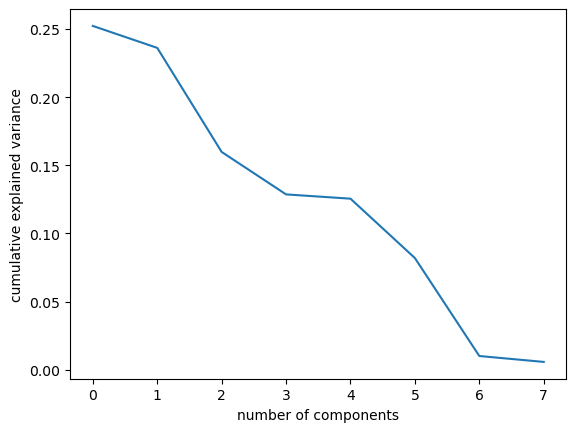

In [15]:
plt.plot(pca1.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [16]:
pca2 = PCA(0.95)
X_pca2 = pca2.fit_transform(X_train)
X_pca2.shape

(16512, 6)

In [17]:
pca2.explained_variance_ratio_

array([0.25230244, 0.23618836, 0.15979927, 0.12863355, 0.12549643,
       0.08190432])